# Sales Trend Analysis: Insights into Customer Behavior, Revenue Drivers, and Operational Efficiency

# Introduction

In today's competitive retail environment, data-driven insights are essential for improving sales performance, optimizing operations, and enhancing customer experience. This project analyzes a comprehensive dataset of online and in-store transactions to uncover trends and patterns influencing sales performance.

The analysis covers sales volume, customer behavior, and logistical efficiency across different sales channels, aiming to provide actionable insights for improving business outcomes.



# Problem Statement

Retail businesses often face challenges such as uneven sales performance, customer churn, and high return rates. Without detailed insights into sales data, businesses struggle to identify the underlying issues impacting revenue and operational efficiency. This project seeks to address these gaps by exploring sales trends, customer preferences, and operational metrics in a retail dataset.



# Aim of the Project

The primary aim of this project is to analyze sales data to:

Identify key factors driving sales and revenue.
Understand customer behavior and preferences across channels.
Evaluate operational aspects, including return rates and shipping efficiency.
Provide actionable recommendations to enhance sales performance and operational efficiency.


# Exploratory Data Analysis (EDA) Findings

Key Observations:
Sales Trends:

The dataset shows higher sales volume in specific months, indicating seasonality.
Online sales account for a significant proportion of total revenue compared to in-store sales.
Customer Insights:

A considerable number of customers make repeat purchases, indicating loyalty opportunities.
Certain categories, such as Electronics, have higher return rates compared to others.
Operational Metrics:

Discounts and shipping costs significantly influence purchase quantities and customer satisfaction.
Warehouse locations with higher delays contribute to customer dissatisfaction.
Product Performance:

High-selling items are concentrated in a few categories, with Apparel and Accessories consistently ranking higher.


# Loading and Exploring the Data:

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
data = pd.read_csv('~/Desktop/projects/online_sales_dataset.csv')

print(data.head())

   InvoiceNo StockCode Description  Quantity       InvoiceDate  UnitPrice  \
0     221958  SKU_1964   White Mug        38  2020-01-01 00:00       1.71   
1     771155  SKU_1241   White Mug        18  2020-01-01 01:00      41.25   
2     231932  SKU_1501  Headphones        49  2020-01-01 02:00      29.11   
3     465838  SKU_1760   Desk Lamp        14  2020-01-01 03:00      76.68   
4     359178  SKU_1386   USB Cable       -30  2020-01-01 04:00     -68.11   

   CustomerID         Country  Discount  PaymentMethod  ShippingCost  \
0     37039.0       Australia  0.470000  Bank Transfer         10.79   
1     19144.0           Spain  0.190000        paypall          9.51   
2     50472.0         Germany  0.350000  Bank Transfer         23.03   
3     96586.0     Netherlands  0.140000        paypall         11.08   
4         NaN  United Kingdom  1.501433  Bank Transfer           NaN   

      Category SalesChannel  ReturnStatus ShipmentProvider WarehouseLocation  \
0      Apparel     In-st

In [66]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Discount', 'PaymentMethod',
       'ShippingCost', 'Category', 'SalesChannel', 'ReturnStatus',
       'ShipmentProvider', 'WarehouseLocation', 'OrderPriority'],
      dtype='object')

In [67]:
data_types = data.dtypes
data_types

InvoiceNo              int64
StockCode             object
Description           object
Quantity               int64
InvoiceDate           object
UnitPrice            float64
CustomerID           float64
Country               object
Discount             float64
PaymentMethod         object
ShippingCost         float64
Category              object
SalesChannel          object
ReturnStatus          object
ShipmentProvider      object
WarehouseLocation     object
OrderPriority         object
dtype: object

In [68]:
data.shape

(49782, 17)

In [69]:
data.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID,Discount,ShippingCost
count,49782.000000,49782.000000,49782.000000,44804.000000,49782.000000,47293.000000
mean,550681.239946,22.372343,47.537862,55032.871775,0.275748,17.494529
std,260703.009944,17.917774,33.479510,25913.660157,0.230077,7.220557
min,100005.000000,-50.000000,-99.980000,10001.000000,0.000000,5.000000
25%,324543.000000,11.000000,23.592500,32750.750000,0.130000,11.220000
50%,552244.000000,23.000000,48.920000,55165.000000,0.260000,17.500000
75%,776364.000000,37.000000,74.610000,77306.250000,0.380000,23.720000
max,999997.000000,49.000000,100.000000,99998.000000,1.999764,30.000000


In [70]:
print(data.duplicated().sum())

0


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49782 entries, 0 to 49781
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          49782 non-null  int64  
 1   StockCode          49782 non-null  object 
 2   Description        49782 non-null  object 
 3   Quantity           49782 non-null  int64  
 4   InvoiceDate        49782 non-null  object 
 5   UnitPrice          49782 non-null  float64
 6   CustomerID         44804 non-null  float64
 7   Country            49782 non-null  object 
 8   Discount           49782 non-null  float64
 9   PaymentMethod      49782 non-null  object 
 10  ShippingCost       47293 non-null  float64
 11  Category           49782 non-null  object 
 12  SalesChannel       49782 non-null  object 
 13  ReturnStatus       49782 non-null  object 
 14  ShipmentProvider   49782 non-null  object 
 15  WarehouseLocation  46297 non-null  object 
 16  OrderPriority      497

In [72]:
data['Country'].unique()

array(['Australia', 'Spain', 'Germany', 'Netherlands', 'United Kingdom',
       'Sweden', 'Belgium', 'Norway', 'Italy', 'Portugal', 'France',
       'United States'], dtype=object)

# Data Cleaning and Preprocessing:

In [73]:
nl_values=data.isnull().sum()
nl_values.to_frame('count')

,count
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,4978
Country,0
Discount,0
PaymentMethod,0


In [74]:
data=data.dropna() #Removing few missing values in dataset

In [75]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate']) #Changing data type of InvoiceDate

In [76]:
Country_counts = data['Country'].value_counts()
Country_counts

Country
France            3820
Sweden            3771
Germany           3763
Netherlands       3753
Portugal          3747
Belgium           3745
Norway            3740
United Kingdom    3735
Spain             3700
Australia         3698
United States     3690
Italy             3642
Name: count, dtype: int64

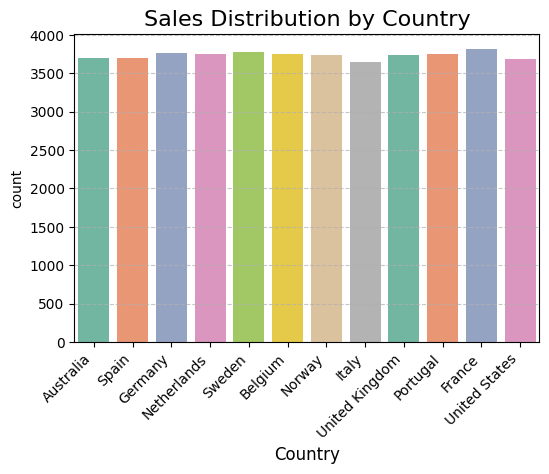

In [77]:
plt.figure(figsize=(6, 4))

sns.countplot(data=data, x='Country', hue='Country', palette='Set2', legend=False)

plt.title('Sales Distribution by Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [78]:
data['PaymentMethod'].unique()

array(['Bank Transfer', 'paypall', 'Credit Card'], dtype=object)

In [79]:
Mode_of_Payment_counts = data['PaymentMethod'].value_counts()
Mode_of_Payment_counts

PaymentMethod
Bank Transfer    15086
Credit Card      14907
paypall          14811
Name: count, dtype: int64

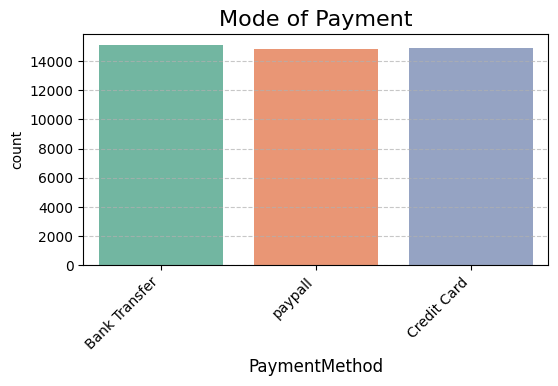

In [80]:
plt.figure(figsize=(6, 3))
sns.countplot(data=data, x='PaymentMethod', hue='PaymentMethod', palette='Set2')
plt.title('Mode of Payment', fontsize=16)
plt.xlabel('PaymentMethod', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.title('Mode of Payment', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [81]:
SalesChannel_counts = data['SalesChannel'].value_counts()
SalesChannel_counts

SalesChannel
Online      22520
In-store    22284
Name: count, dtype: int64

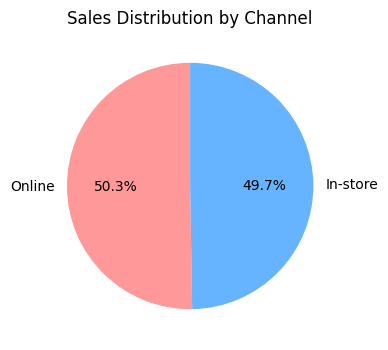

In [148]:
plt.figure(figsize=(6,4))
data['SalesChannel'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title("Sales Distribution by Channel", fontsize=12)
plt.ylabel("")

plt.show()

In [83]:
OrderPriority_counts = data['OrderPriority'].value_counts()
OrderPriority_counts

OrderPriority
Medium    14972
High      14934
Low       14898
Name: count, dtype: int64

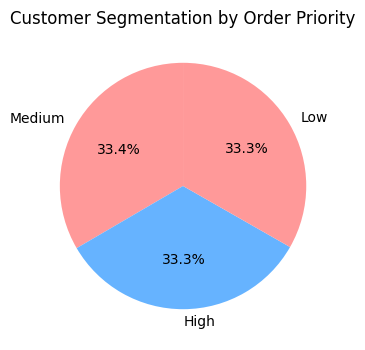

In [147]:
order_priority_counts = data['OrderPriority'].value_counts()
plt.figure(figsize=(6, 4))
plt.pie(order_priority_counts.values, labels=order_priority_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
plt.title("Customer Segmentation by Order Priority", fontsize=12)

plt.show()

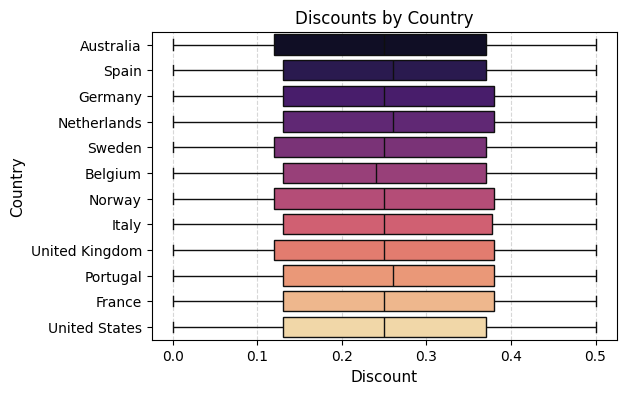

In [146]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="Discount", y="Country", hue="Country",palette="magma", showfliers=False, data=data)
plt.title("Discounts by Country", fontsize=12)
plt.xlabel("Discount", fontsize=11)
plt.ylabel("Country", fontsize=11)
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()


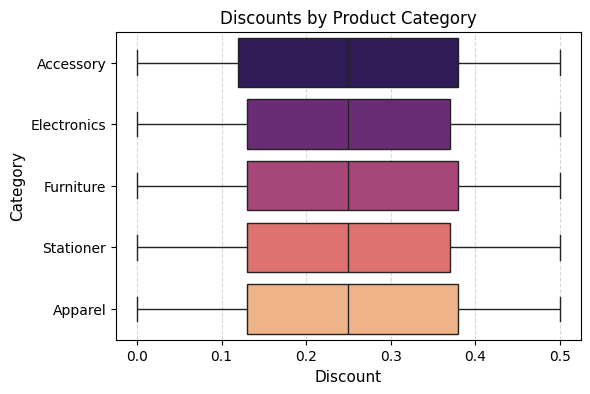

In [145]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Discount", y="Category", hue="Category", palette="magma", showfliers=False, data=data)
plt.title("Discounts by Product Category", fontsize=12)
plt.xlabel("Discount", fontsize=11)
plt.ylabel("Category", fontsize=11)
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()

In [87]:
Category_counts = data['Category'].value_counts()
Category_counts

Category
Furniture      9074
Stationery     8957
Electronics    8956
Accessories    8926
Apparel        8891
Name: count, dtype: int64

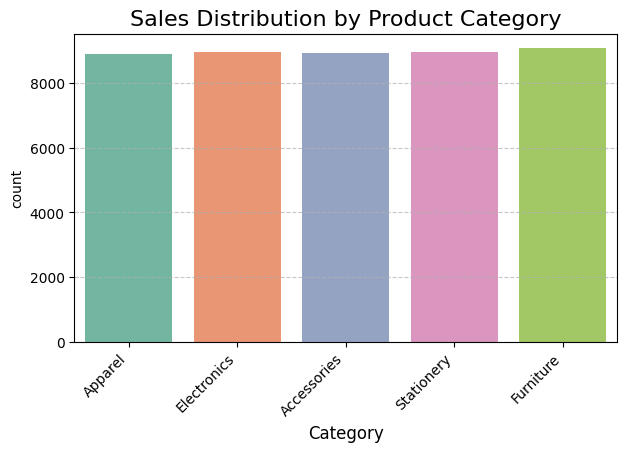

In [88]:
plt.figure(figsize=(7, 4))
sns.countplot(data=data, x='Category', hue='Category', palette='Set2', legend=False)
plt.title('Sales Distribution by Product Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [144]:
#I saw the mistakes in the Category.
Category = {
    'Backpack': 'Accessory',  
    'Blue Pen': 'Stationer',
    'Notebook': 'Stationer',
    'Office Chair': 'Furniture',
    'Wall Clock': 'Accessory',
    'White Mug': 'Accessory',
    'Wireless Mouse': 'Electronics',
    'USB Cable': 'Electronics',
    'Headphones': 'Electronics',
    'T-shirt': 'Apparel',
    'Desk Lamp':'Accessory'} # I made a correct grouping for the Category column.

data['Category'] = data['Description'].map(Category) 
data.groupby(["Category","Description"]).size()

Category     Description   
Accessory    Backpack          4122
             Desk Lamp         4103
             Wall Clock        4159
             White Mug         4091
Apparel      T-shirt           4050
Electronics  Headphones        4058
             USB Cable         4130
             Wireless Mouse    3975
Furniture    Office Chair      4065
Stationer    Blue Pen          4036
             Notebook          4015
dtype: int64

In [90]:
ShipmentProvider_counts = data['ShipmentProvider'].value_counts()
ShipmentProvider_counts

ShipmentProvider
FedEx         11296
Royal Mail    11196
UPS           11158
DHL           11154
Name: count, dtype: int64

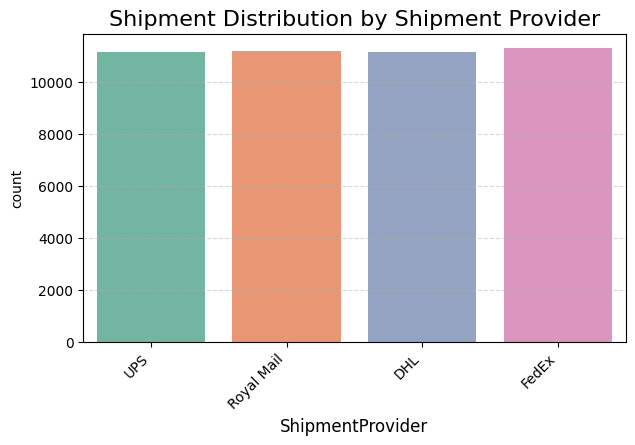

In [91]:
plt.figure(figsize=(7, 4))
sns.countplot(data=data, x='ShipmentProvider', hue='ShipmentProvider', palette='Set2', legend=False)
plt.title('Shipment Distribution by Shipment Provider', fontsize=16)
plt.xlabel('ShipmentProvider', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

In [92]:
ReturnStatus_counts = data['ReturnStatus'].value_counts()
ReturnStatus_counts

ReturnStatus
Not Returned    40417
Returned         4387
Name: count, dtype: int64

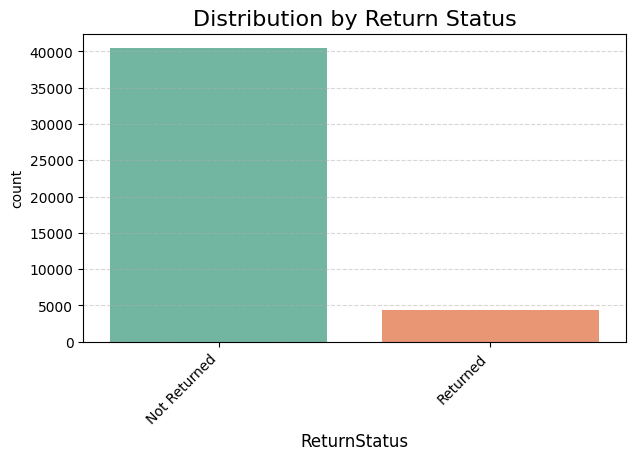

In [93]:
plt.figure(figsize=(7, 4))
sns.countplot(data=data, x='ReturnStatus', hue='ReturnStatus', palette='Set2', legend=False)
plt.title('Distribution by Return Status', fontsize=16)
plt.xlabel('ReturnStatus', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

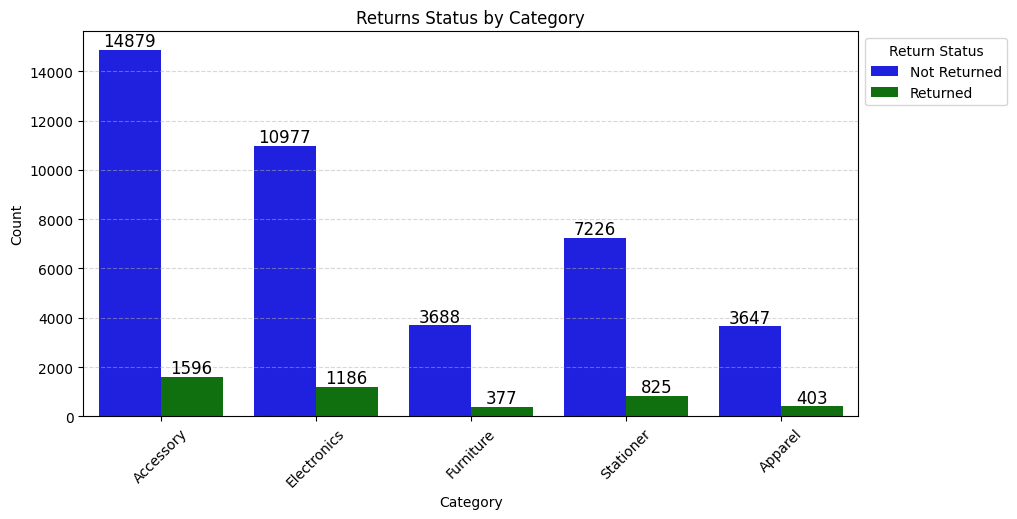

In [153]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.countplot(data=data, x="Category", hue="ReturnStatus", palette={"blue", "green"})
total = len(data)
for container in ax.containers:
    for i, bar in enumerate(container):
        height = bar.get_height() 
        ax.annotate(f"{int(height)}", (bar.get_x() + bar.get_width() / 2, height - 5),
                     ha='center', va='bottom', fontsize=12)
plt.legend(title='Return Status', loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Returns Status by Category")
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

In [95]:
data['WarehouseLocation'] =  data['WarehouseLocation'].apply(lambda x: np.random.choice(warehouse_locations) if pd.isna(x) else x)

In [96]:
WarehouseLocation_counts = data['WarehouseLocation'].value_counts()
WarehouseLocation_counts

WarehouseLocation
Amsterdam    9175
London       8947
Rome         8935
Berlin       8910
Paris        8837
Name: count, dtype: int64

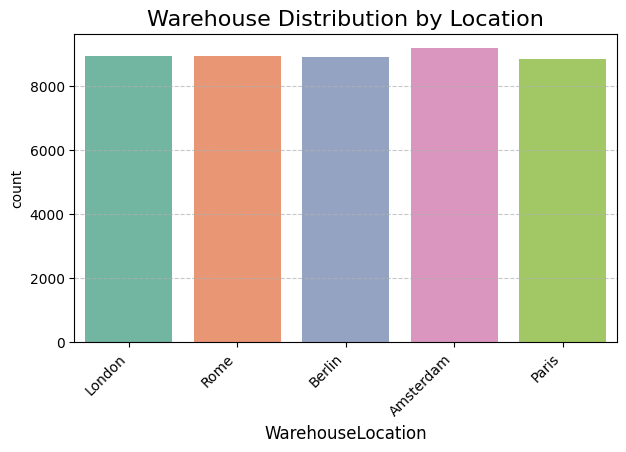

In [97]:
plt.figure(figsize=(7, 4))
sns.countplot(data=data, x='WarehouseLocation', hue='WarehouseLocation', palette='Set2', legend=False)
plt.title('Warehouse Distribution by Location', fontsize=16)
plt.xlabel('WarehouseLocation', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

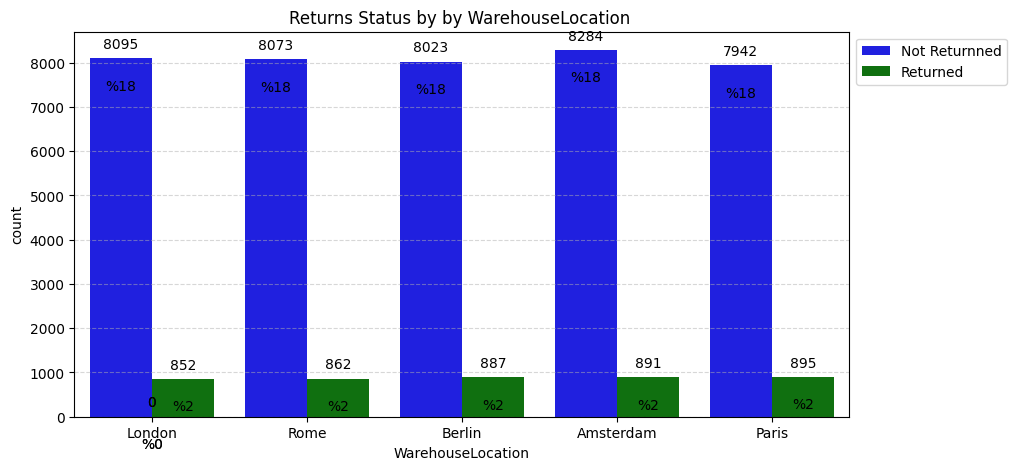

In [98]:
fig, ax = plt.subplots(figsize = (10, 5))
ax = sns.countplot(data = data, x = "WarehouseLocation", hue = "ReturnStatus", palette={"blue", "green"})
total = len(data)
total = len(data)

for p in ax.patches:
    height = p.get_height() 
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., p.get_height() - 0.5), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    percentage = 100 * height / total
    ax.annotate(f'%{percentage:.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, -20), textcoords='offset points')
    plt.legend(['Not Returnned', 'Returned'], loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Returns Status by by WarehouseLocation ")
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


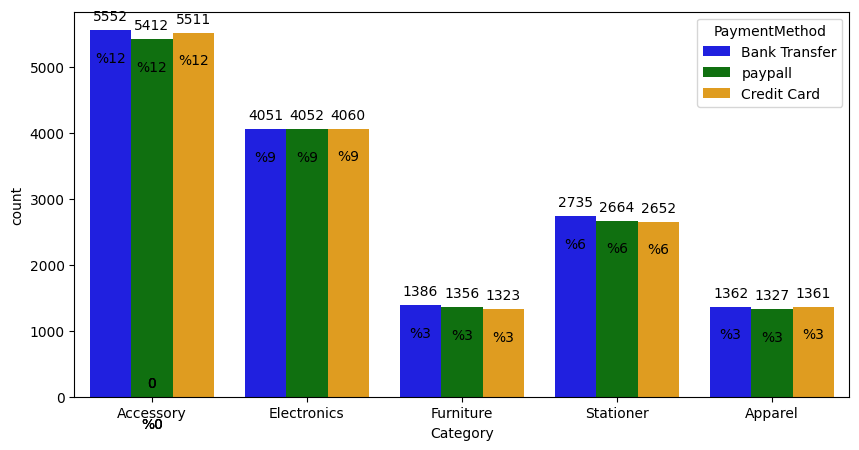

In [99]:
fig, ax = plt.subplots(figsize = (10, 5))
ax = sns.countplot(data = data, x = "Category", hue = "PaymentMethod", palette={"blue", "orange", "green"})
total = len(data)
total = len(data)
for p in ax.patches:
    height = p.get_height() 
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., p.get_height() - 0.5), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    percentage = 100 * height / total
    ax.annotate(f'%{percentage:.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, -20), textcoords='offset points')

plt.show()

In [100]:
data["total_sales"]=data["Quantity"]*data["UnitPrice"] #calulated total sales
data["discounted_total_sales"]=round(data["total_sales"]*(1-(data["Discount"]/100)),2) #calculated discounted sales

In [101]:
data["year"]=pd.to_datetime(data["InvoiceDate"]).dt.year
data["month"]=pd.to_datetime(data["InvoiceDate"]).dt.month
data["month_name"]=pd.to_datetime(data["InvoiceDate"]).dt.month_name()
data["day"]=pd.to_datetime(data["InvoiceDate"]).dt.day
data["day_name"]=pd.to_datetime(data["InvoiceDate"]).dt.day_name()

In [102]:
data.groupby(["year"])[["total_sales"]].sum()

,total_sales
year,
2020,9941131.17
2021,9977902.43
2022,9815037.97
2023,9864834.93
2024,10039228.80
2025,6763209.76


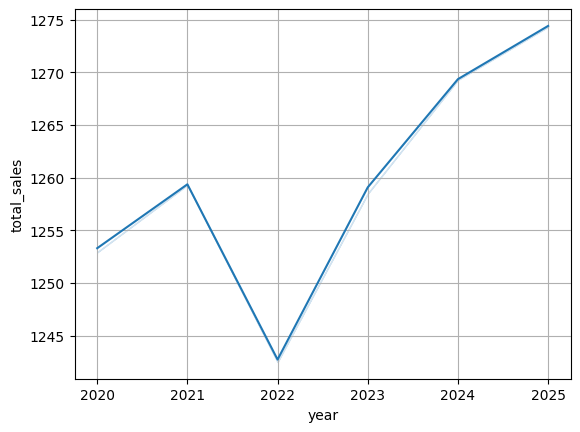

In [140]:
sns.lineplot(x=data["year"],y=data["total_sales"],errorbar=('ci', False))
plt.grid(True)

In [104]:
data.groupby(["year"])[["discounted_total_sales"]].sum()

,discounted_total_sales
year,
2020,9916250.53
2021,9953101.21
2022,9790587.68
2023,9839945.27
2024,10014307.90
2025,6746290.80


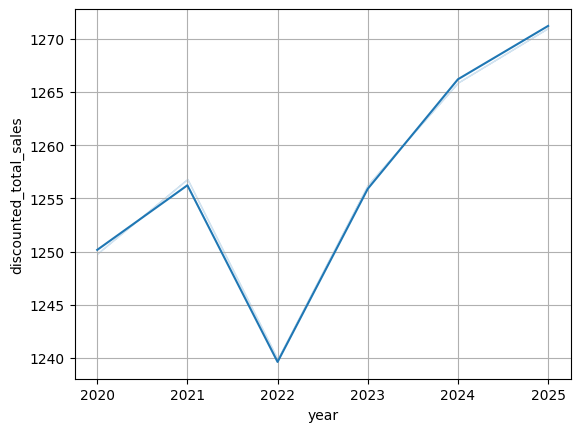

In [139]:
sns.lineplot(x=data["year"],y=data["discounted_total_sales"],errorbar=('ci', False))
plt.grid(True) 

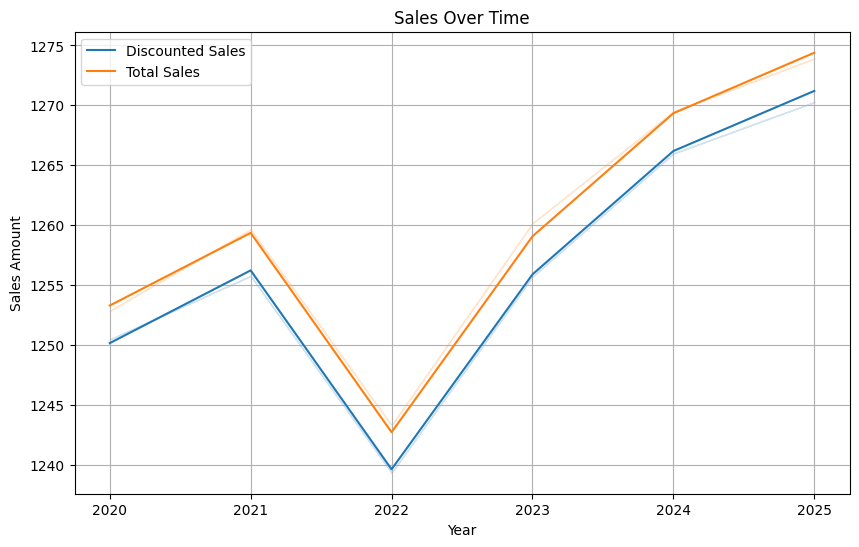

In [138]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=data["year"], y=data["discounted_total_sales"], errorbar=('ci', False), label="Discounted Sales")
sns.lineplot(x=data["year"], y=data["total_sales"], errorbar=('ci', False), label="Total Sales")
plt.title("Sales Over Time")
plt.xlabel("Year")
plt.ylabel("Sales Amount")
plt.legend()
plt.grid(True)

plt.show()

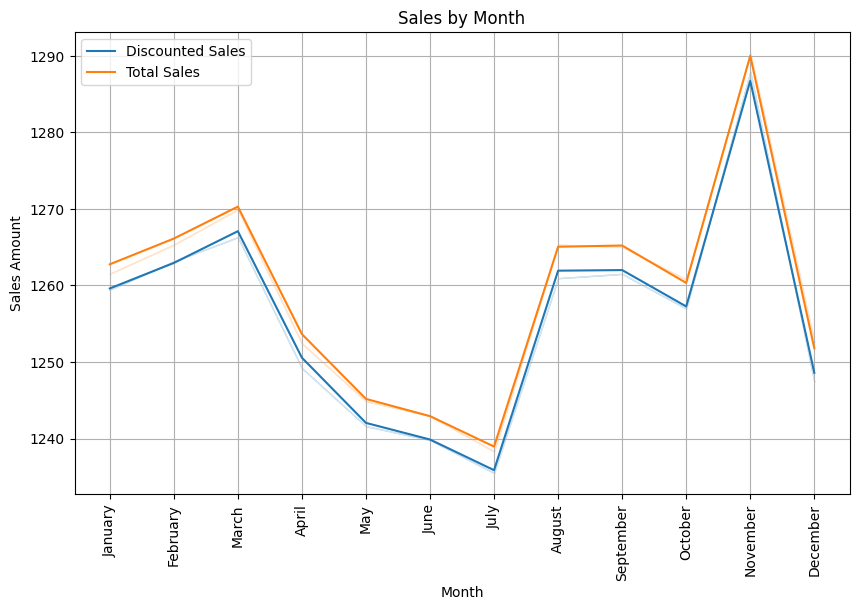

In [136]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=data["month_name"], y=data["discounted_total_sales"], errorbar=('ci', False), label="Discounted Sales")
sns.lineplot(x=data["month_name"], y=data["total_sales"], errorbar=('ci', False), label="Total Sales")

plt.xticks(rotation=90)
plt.title("Sales by Month")
plt.xlabel("Month")
plt.ylabel("Sales Amount")
plt.legend()  
plt.grid(True) 

plt.show()

<Figure size 1200x600 with 0 Axes>

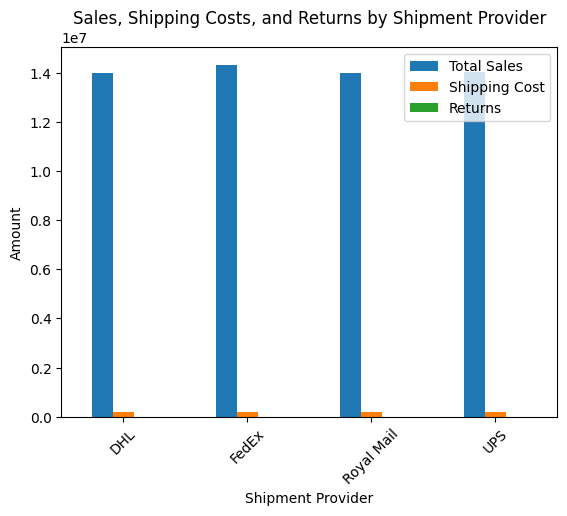

In [132]:
sales_by_provider = data.groupby('ShipmentProvider')['total_sales'].sum().reset_index()
shipping_cost_by_provider = data.groupby('ShipmentProvider')['ShippingCost'].sum().reset_index()
returns_by_provider = data[data['ReturnStatus'] == 'Returned'].groupby('ShipmentProvider')['InvoiceNo'].count().reset_index()

combined_data = sales_by_provider.merge(shipping_cost_by_provider, on='ShipmentProvider')
combined_data = combined_data.merge(returns_by_provider, on='ShipmentProvider')

plt.figure(figsize=(12, 6))
combined_data.plot(x='ShipmentProvider', kind='bar', rot=45)
plt.title('Sales, Shipping Costs, and Returns by Shipment Provider')
plt.xlabel('Shipment Provider')
plt.ylabel('Amount')
plt.legend(['Total Sales', 'Shipping Cost', 'Returns'])
plt.show()

In [109]:
total_shipping_cost = data['ShippingCost'].sum()
total_shipping_cost

783362.3799999999

In [110]:
avg_shipping_cost = data['ShippingCost'].mean()
avg_shipping_cost

17.484206320864207

Text(0.5, 1.0, 'Shipping Cost by Warehouse Location')

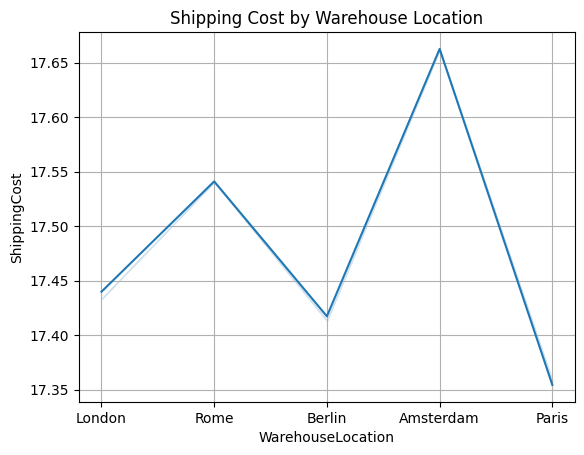

In [123]:
sns.lineplot(x=data['WarehouseLocation'],y=data['ShippingCost'],errorbar=('ci', False))
plt.grid(True)
plt.title('Shipping Cost by Warehouse Location')

Text(0.5, 1.0, 'Shipping Cost by Category')

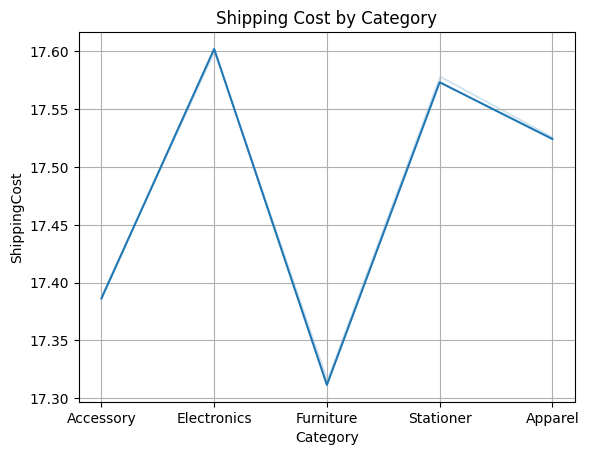

In [124]:
sns.lineplot(x=data['Category'],y=data['ShippingCost'],errorbar=('ci', False))
plt.grid(True)
plt.title('Shipping Cost by Category')

Text(0.5, 1.0, 'Shipping Cost by Shipment Provider')

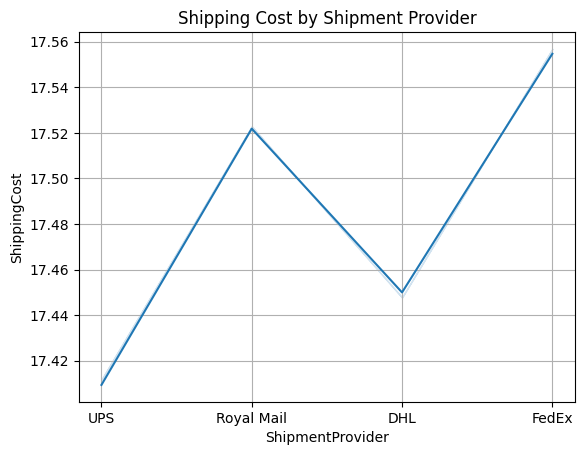

In [125]:
sns.lineplot(x=data['ShipmentProvider'],y=data['ShippingCost'],errorbar=('ci', False))
plt.grid(True)
plt.title('Shipping Cost by Shipment Provider')

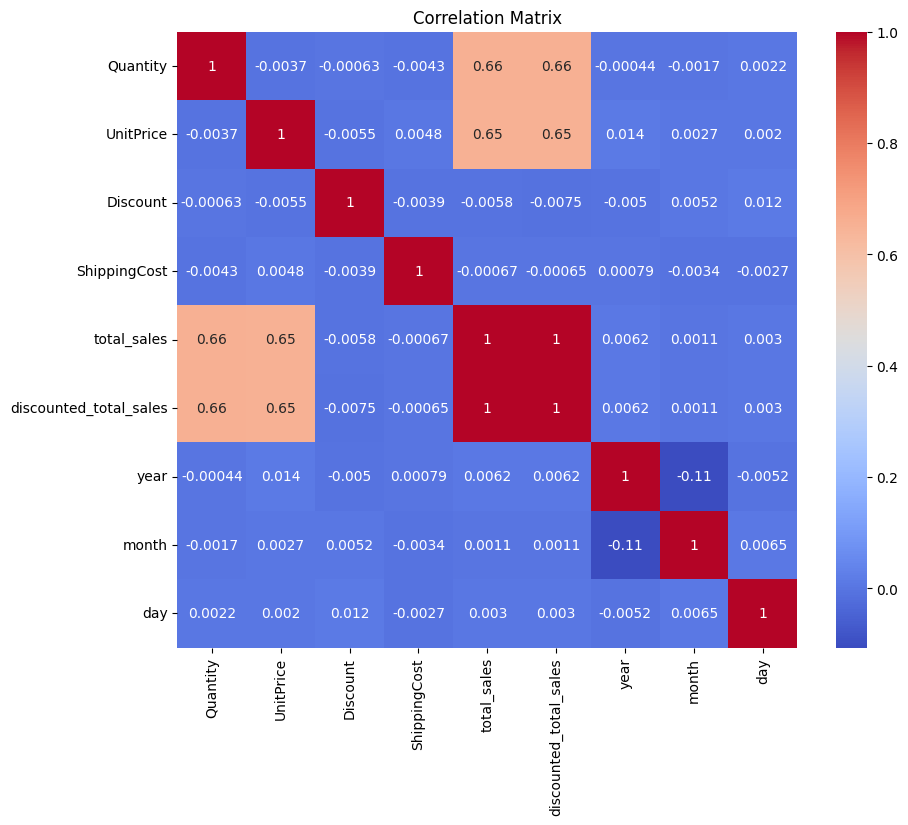

In [154]:
# Select only numeric columns excluding "InvoiceNo" and "CustomerID"
numeric_data = data.select_dtypes(include=[np.number]).drop(columns=['InvoiceNo', 'CustomerID'])

# Calculate correlation matrix
corr_matrix = numeric_data.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<Axes: title={'center': 'Correlation between discount and return rate'}, xlabel='Discount', ylabel='ReturnStatus'>

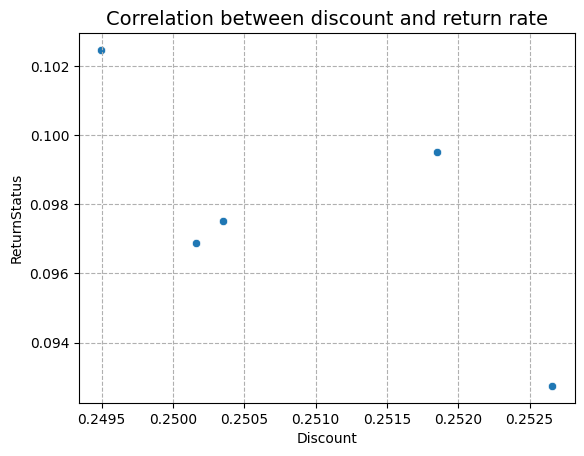

In [155]:
discount_vs_returns = data.groupby('Category').agg({
    'Discount': 'mean',
    'ReturnStatus': lambda x: (x == 'Returned').mean()
}).reset_index()
plt.title('Correlation between discount and return rate', fontsize=14)
plt.grid(True, linestyle='--')

sns.scatterplot(data=discount_vs_returns, x='Discount', y='ReturnStatus')

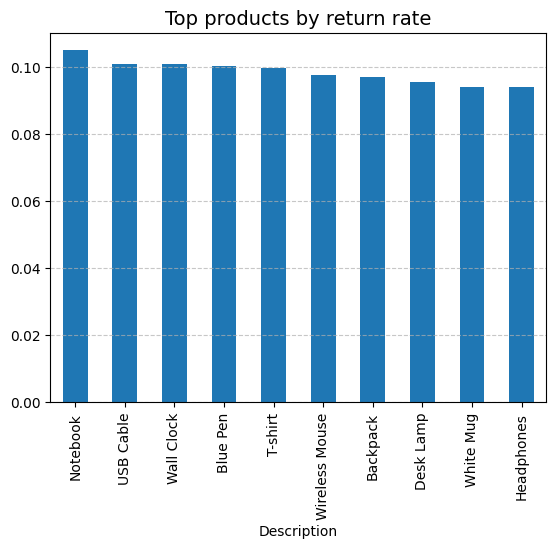

In [156]:
returns = data[data['ReturnStatus'] == 'Returned']
return_rate = returns['Description'].value_counts() / data['Description'].value_counts()
return_rate.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top products by return rate', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

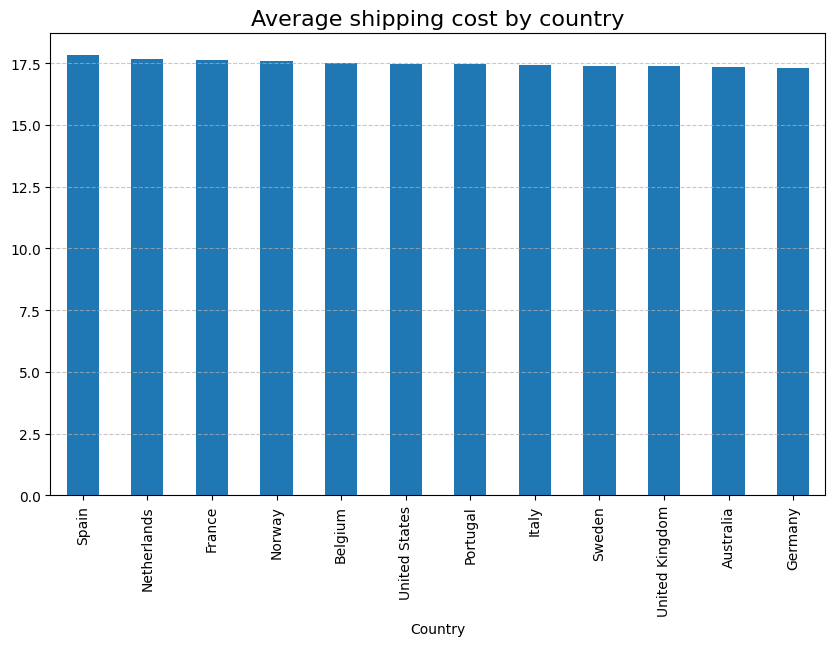

In [55]:
shipping_cost_analysis = data.groupby('Country')['ShippingCost'].mean().sort_values(ascending=False)
shipping_cost_analysis.plot(kind='bar', figsize=(10, 6))
plt.title('Average shipping cost by country', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

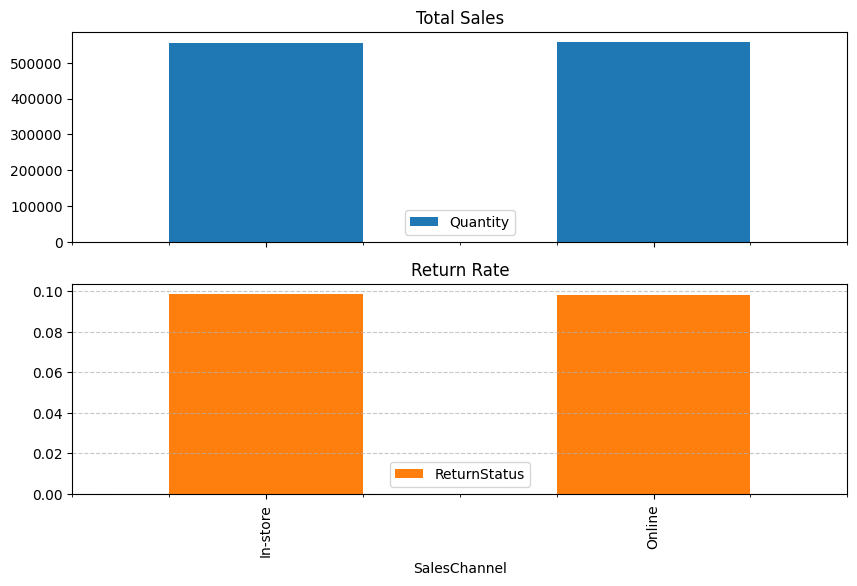

In [43]:
# Comparing sales by channel
channel_analysis = data.groupby('SalesChannel').agg({'Quantity': 'sum', 'ReturnStatus': lambda x: (x == 'Returned').mean()})

channel_analysis.plot(kind='bar', subplots=True, figsize=(10, 6), title=['Total Sales', 'Return Rate'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

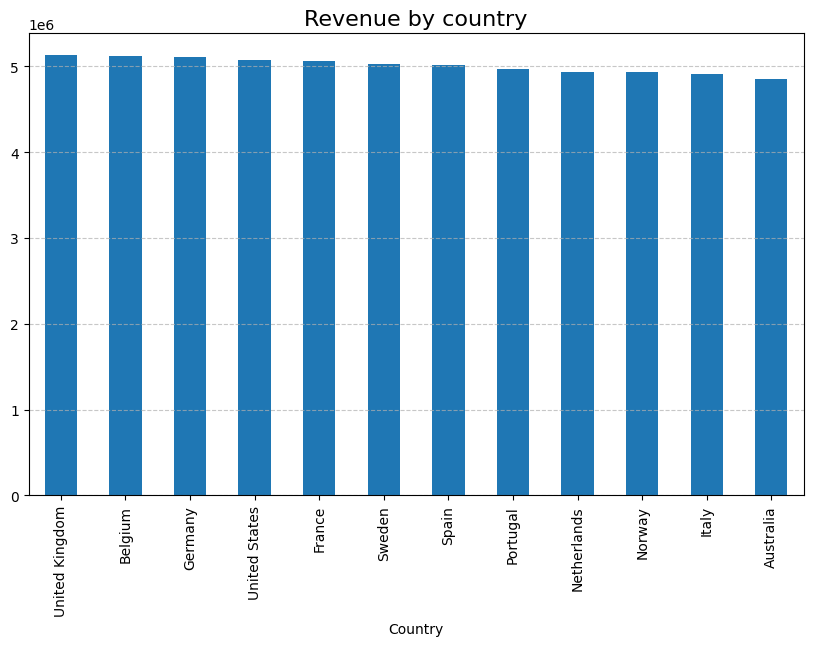

In [54]:
data['Revenue'] = data['Quantity'] * data['UnitPrice']
regional_revenue = data.groupby('Country')['Revenue'].sum().sort_values(ascending=False)
regional_revenue.plot(kind='bar', figsize=(10, 6))
plt.title('Revenue by country', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

<Axes: title={'center': 'Average order value by payment method'}, xlabel='PaymentMethod', ylabel='Revenue'>

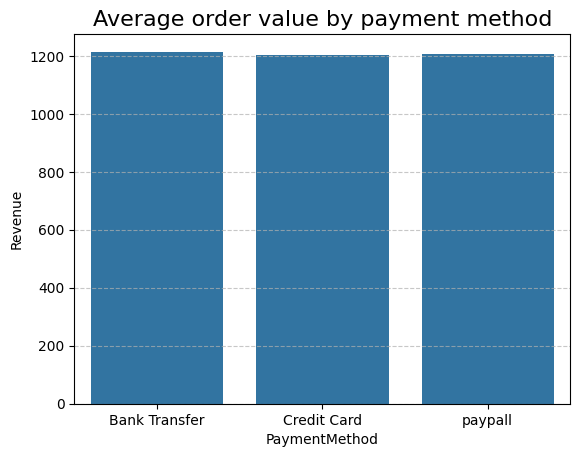

In [59]:
payment_method_analysis = data.groupby('PaymentMethod').agg({
    'Revenue': 'mean', 'ReturnStatus': lambda x: (x == 'Returned').mean()})
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Average order value by payment method', fontsize=16)
sns.barplot(data=payment_method_analysis.reset_index(), x='PaymentMethod', y='Revenue')

<Axes: title={'center': 'Customer lifetime value (CLV)'}, xlabel='Quantity', ylabel='Revenue'>

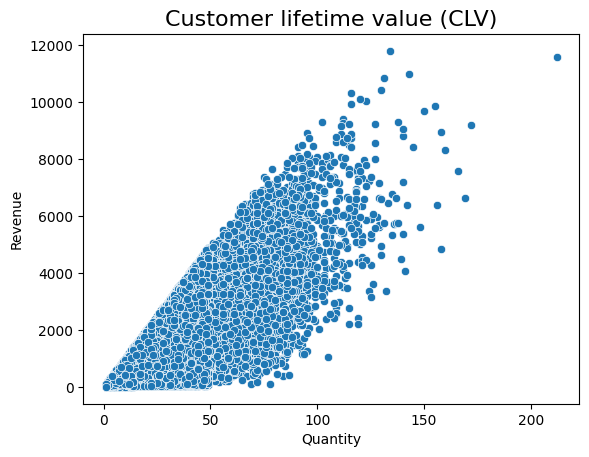

In [50]:
clv = data.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'Revenue': 'sum'
}).reset_index()
plt.title('Customer lifetime value (CLV)', fontsize=16)
sns.scatterplot(data=clv, x='Quantity', y='Revenue')

# Key Insights

Discounts and shipping costs are critical levers for boosting sales, particularly in competitive categories.
High return rates for Electronics suggest potential quality issues or mismatched customer expectations.
Seasonal trends highlight opportunities for targeted marketing campaigns during peak sales months.
Efficient logistics and reliable shipment providers positively impact customer retention.


# Recommendations

Discount Strategy: Introduce dynamic pricing and discount mechanisms to attract more customers while maintaining profitability.
Product Quality Improvements: Investigate high return rates in Electronics to address product or service issues.
Seasonal Marketing: Launch targeted promotional campaigns during peak seasons to capitalize on increased demand.
Logistics Optimization: Improve warehouse operations and partner with reliable shipment providers to enhance customer satisfaction.
Customer Retention: Use loyalty programs and personalized offers to nurture repeat customers.

# Conclusion

The analysis reveals several key factors influencing sales performance and operational efficiency. Seasonal trends significantly impact sales volume, and a strong online presence drives revenue, emphasizing the importance of e-commerce channels. Customer behavior indicates loyalty opportunities but highlights challenges, such as high return rates in certain categories. Operational metrics like shipping cost and warehouse efficiency play a pivotal role in shaping customer satisfaction.

By addressing these insights through targeted discounts, enhanced logistics, and customer-focused strategies, the business can mitigate challenges and capitalize on growth opportunities. The findings emphasize the importance of a data-driven approach to decision-making for sustained competitive advantage.